In [127]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency, ttest_ind, pearsonr

# link to Kaggle competition
# https://www.kaggle.com/competitions/mlpro-classification-bank-churn-2025


In [138]:
# Dataset
# Customer ID : Un identifiant pour chaque client
# Surname : Le nom de famille du client
# Credit Score : Une valeur numérique représentant le score de crédit du client
# Geography : Le pays où réside le client (France, Spain ou Germany)
# Gender : Le genre du client (Male or Female)
# Age : L’âge du client
# Tenure : Le nombre d’années pendant lesquelles le client est avec la banque
# Balance : Le solde du compte du client
# NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d’épargne, carte de crédit)
# HasCrCard : Si le client possède une carte de crédit (1 = oui, 0 = non)
# IsActiveMember : Si le client est un membre actif (1 = oui, 0 = non)
# EstimatedSalary : Le salaire estimé du client
# Exited : Si le client a résilié (1 = oui, 0 = non)

df = pd.read_csv('data/train_data.csv')
df_exited = df["Exited"]

df


,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,Germany,Male,45.0,3,111634.29,1,1.0,1.0,103349.74,0
143575,95939,15769974,Shih,597,Germany,Male,41.0,10,119182.73,1,0.0,0.0,121299.14,0
143576,152315,15592028,Hsiao,576,Spain,Male,31.0,6,127299.56,1,1.0,1.0,57569.89,0
143577,117952,15804009,Ch'ang,751,France,Female,27.0,4,90721.11,1,0.0,0.0,84496.78,0


# Analyse

### IsActiveMember

In [51]:
df_active_member = df["IsActiveMember"]

# IsActiveMember et Exited sont 2 variables discrète
pd.crosstab(df["IsActiveMember"], df["Exited"])

Exited,0,1
IsActiveMember,,
0.0,50742,21507
1.0,62387,8943


In [47]:
exited_count = len(df.query("Exited == 1"))
exited_count
exited_inactive_percentage = len(df.query('Exited == 1 and IsActiveMember == 0')) / exited_count
exited_active_percentage = len(df.query('Exited == 1 and IsActiveMember == 1')) / exited_count
print(f"{exited_inactive_percentage:.0%} des inactifs ont quitté la banque vs {exited_active_percentage:.0%} des actifs")

71% des inactifs ont quitté la banque vs 29% des actifs


In [ ]:
# Test du chi2 pour vérifier que IsActiveMember et Exited ne sont pas indépendante

# Hypothèse H0
# Le fait qu'un client soit actif ou non qu'il ait quitté sa banque sont 2 variables indépendantes l'une de l'autre

alpha = 0.02
contingency_table = pd.crosstab(df["IsActiveMember"], df["Exited"])
p_value = chi2_contingency(contingency_table).pvalue
print(p_value)
# Les 2 variables ne sont bien pas indépendantes l'une de l'autre

0.0


### Tenure

Tenure
2     15766
7     15474
8     15272
4     15257
5     14984
1     14603
9     14557
3     14484
6     13716
10     5120
0      4346
Name: count, dtype: int64
---


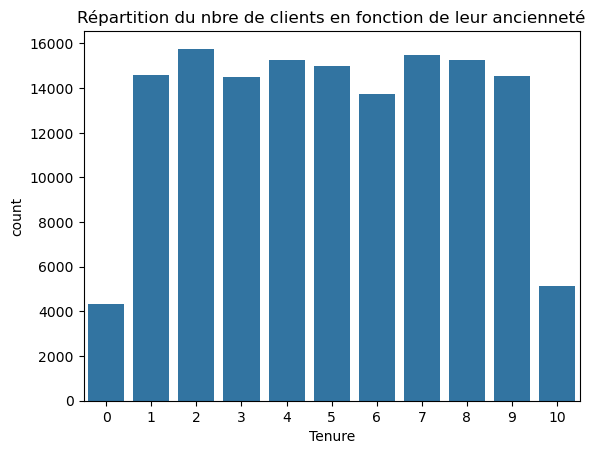

In [5]:
df_tenure = df["Tenure"]
print(df_tenure.value_counts())
print("---")
sns.barplot(df_tenure.value_counts())
plt.title("Répartition du nbre de clients en fonction de leur ancienneté")
plt.show()

In [ ]:
# Test du chi2 pour vérifier que Tenure et Exited ne sont pas indépendante

# Hypothèse H0
print("H0 :# Il n'y a pas de relation entre le nombre d’années pendant lesquelles le client est avec la banque et s'il a résilié")

alpha = 0.02
contingency_table = pd.crosstab(df_tenure, df_exited)
p_value = chi2_contingency(contingency_table).pvalue
print(f"p_value = {p_value}")
if(p_value < alpha):
   print("Nous pouvons rejeter H0")
else:
   print("Nous n'avons pas suffisamment d'éléments pour rejeter H0")

# Les 2 variables ne sont bien dépendantes l'une de l'autre

p_value = 1.2928386983146468e-44
Nous pouvons rejeter H0


### Age

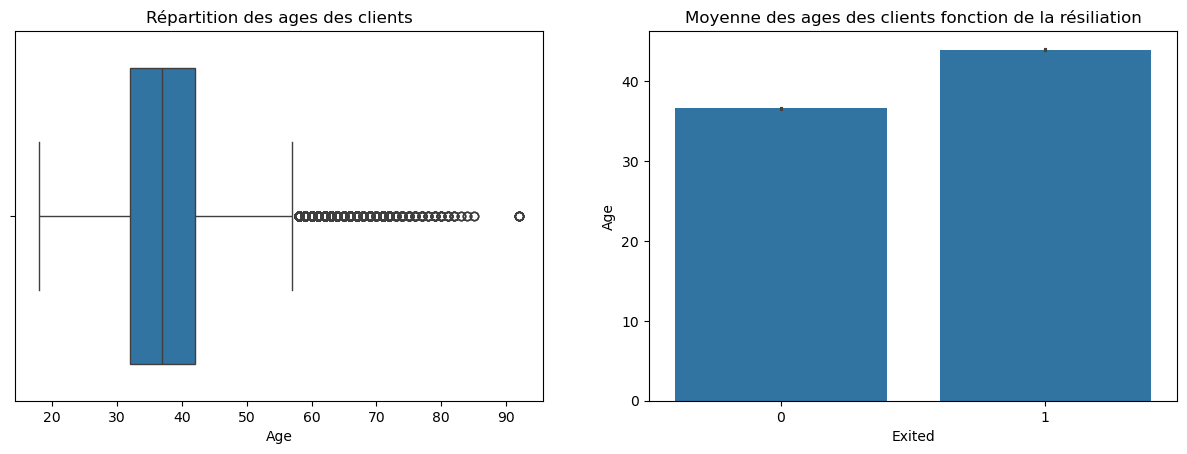

Les clients ayant résiliés semblent avoir en moyenne un age plus élevé.


In [ ]:
df_age = df["Age"]
df_age.describe()

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
axs[0].set_title('Répartition des ages des clients')
axs[1].set_title('Moyenne des ages des clients fonction de la résiliation')
sns.boxplot(df, x="Age", ax=axs[0])
sns.barplot(df, y="Age", x="Exited", ax=axs[1])
plt.show()

print("Les clients ayant résiliés semblent avoir en moyenne un age plus élevé.")

In [35]:
print("H0 : Il n'y a pas de différence d'age entre les clients ayant résiliés et ceux n'ayant pas résilié.")
# Test de student 2 groupes indépendant


df_exited = df.query('Exited == 1')
df_not_exited = df.query('Exited == 0')

alpha = 0.02
results = ttest_ind(df_exited["Age"], df_not_exited["Age"])
print(results)
print(f"p_value = {results.pvalue}")
if(results.pvalue < alpha):
   print("Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence d'age entre les clients ayant résiliés et ceux n'ayant pas résilié.")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")

H0 : Il n'y a pas de différence d'age entre les clients ayant résiliés et ceux n'ayant pas résilié.
TtestResult(statistic=np.float64(136.5764217714973), pvalue=np.float64(0.0), df=np.float64(143577.0))
p_value = 0.0
Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence d'age entre les clients ayant résiliés et ceux n'ayant pas résilié.


### Credit score

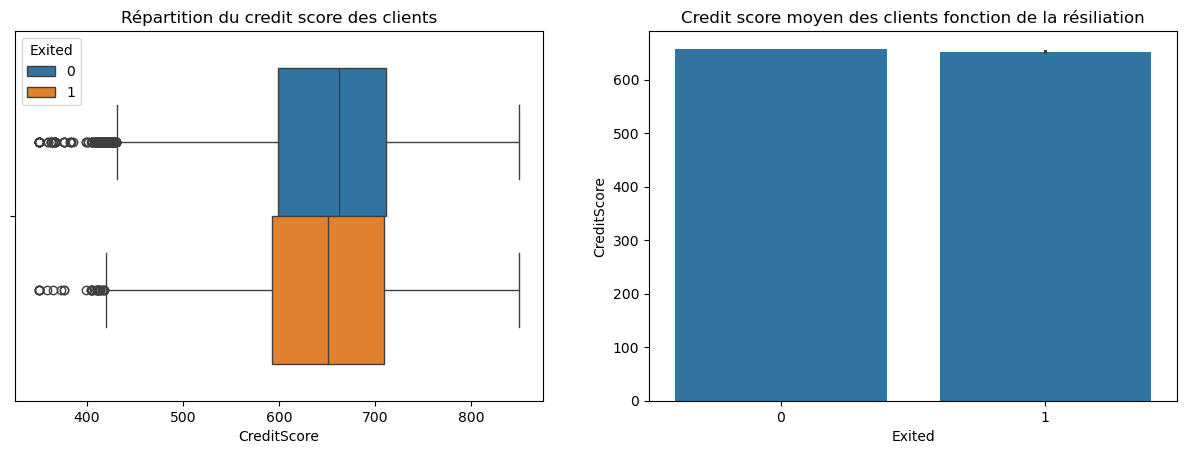

Les clients ayant résiliés semblent avoir en moyenne le même credit score que ceux n'ayant pas résiliés.


In [41]:
df_creditscore = df["CreditScore"]
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
axs[0].set_title('Répartition du credit score des clients')
axs[1].set_title('Credit score moyen des clients fonction de la résiliation')
sns.boxplot(df, x="CreditScore", hue="Exited", ax=axs[0])
sns.barplot(df, y="CreditScore", x="Exited", ax=axs[1])
plt.show()

print("Les clients ayant résiliés semblent avoir en moyenne le même credit score que ceux n'ayant pas résiliés.")



In [ ]:
print("H0 : Il n'y a pas de différence de credit score entre les clients ayant résiliés et ceux n'ayant pas résilié.")
# Test de student 2 groupes indépendant

df_exited = df.query('Exited == 1')
df_not_exited = df.query('Exited == 0')

alpha = 0.02
results = ttest_ind(df_exited["CreditScore"], df_not_exited["CreditScore"])
print(results)
print(f"p_value = {results.pvalue}")
if(results.pvalue < alpha):
   print("Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de credit score  entre les clients ayant résiliés et ceux n'ayant pas résilié.")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")

H0 : Il n'y a pas de différence de credit score entre les clients ayant résiliés et ceux n'ayant pas résilié.
TtestResult(statistic=np.float64(-10.205866104766944), pvalue=np.float64(1.902747972193021e-24), df=np.float64(143577.0))
p_value = 1.902747972193021e-24
Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de credit score  entre les clients ayant résiliés et ceux n'ayant pas résilié.


### Test corrélation entre l'age et le credit score

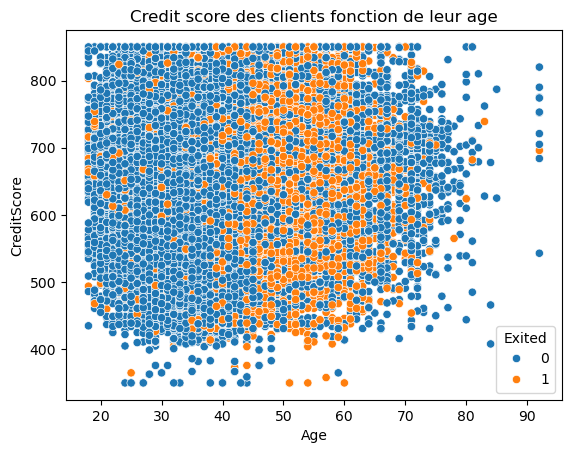

H0: Il n'y a pas de corrélation entre le credit score des clients et leur age
p_value = 0.0001140029159654277
Il semble bien y avoir une corrélation entre le credit score des clients et leur age


In [51]:
sns.scatterplot(df, x="Age", y="CreditScore", hue="Exited")
plt.title("Credit score des clients fonction de leur age")
plt.show()

print("H0: Il n'y a pas de corrélation entre le credit score des clients et leur age")
results = pearsonr(df["Age"], df["CreditScore"])
print(f"p_value = {results.pvalue}")
if(results.pvalue < 0.02):
   print("Il semble bien y avoir une corrélation entre le credit score des clients et leur age")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")


## Geography

Exited         0      1
Geography              
France     68338  13548
Germany    18657  11448
Spain      26134   5454


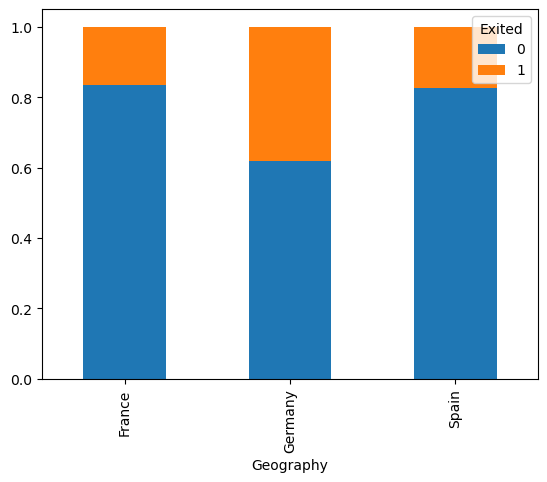

In [ ]:
df_geography = df["Geography"]
crosstab = pd.crosstab(df_geography, df["Exited"])
print(crosstab)

df_plot = pd.crosstab(df_geography, df["Exited"], normalize="index").plot(kind='bar', stacked=True)

print("Le taux de churn semble être plus important en Allemagne qu'en France ou en Espagne")


In [76]:
print("H0: La résilitation d'un client et son pays sont 2 variables indépendantes l'une de l'autre")
contingency_table = pd.crosstab(df["Geography"], df["Exited"])
results = chi2_contingency(contingency_table)
print(results)
if(results.pvalue < 0.02):
   print("Nous pouvons rejeter H0: La résilitation d'un client et son pays sont 2 variables dépendantes l'une de l'autre")
else:
   print("Nous n'avons suffisamment d'évidences pour rejeter H0")

H0: La résilitation d'un client et son pays sont 2 variables indépendantes l'une de l'autre
Chi2ContingencyResult(statistic=np.float64(6455.578335753235), pvalue=np.float64(0.0), dof=2, expected_freq=array([[64519.75075742, 17366.24924258],
       [23720.38073117,  6384.61926883],
       [24888.86851141,  6699.13148859]]))
Nous pouvons rejeter H0: La résilitation d'un client et son pays sont 2 variables dépendantes l'une de l'autre


## Gender

<Axes: xlabel='Gender'>

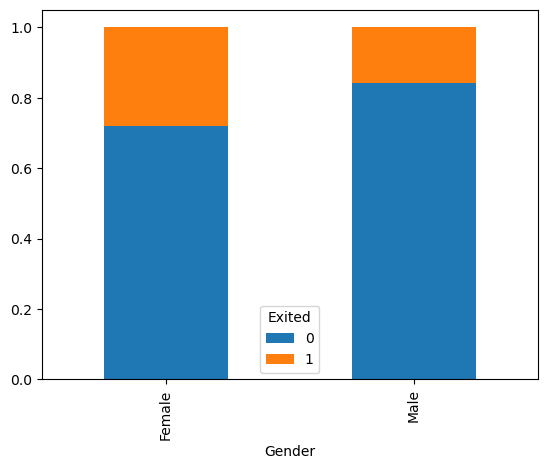

In [ ]:
df_gender = df["Gender"]
df_gender.value_counts()
pd.crosstab(df_gender, df["Exited"], normalize="index").plot(kind="bar", stacked=True)
print("Le taux de churn semble être plus important chez les femmes que chez les hommes")


In [81]:
print("H0: La résilitation d'un client et son sexe sont 2 variables indépendantes l'une de l'autre")
contingency_table = pd.crosstab(df["Gender"], df["Exited"])
results = chi2_contingency(contingency_table)
print(results)
if(results.pvalue < 0.02):
   print("Nous pouvons rejeter H0: La résilitation d'un client et son sexe sont 2 variables dépendantes l'une de l'autre")
else:
   print("Nous n'avons suffisamment d'évidences pour rejeter H0")

H0: La résilitation d'un client et son sexe sont 2 variables indépendantes l'une de l'autre
Chi2ContingencyResult(statistic=np.float64(3127.515772767467), pvalue=np.float64(0.0), dof=1, expected_freq=array([[49334.13714401, 13278.86285599],
       [63794.86285599, 17171.13714401]]))
Nous pouvons rejeter H0: La résilitation d'un client et son sexe sont 2 variables dépendantes l'une de l'autre


## Balance

           count          mean           std  min  25%       50%        75%  \
Exited                                                                        
0       113129.0  51274.230558  62196.885812  0.0  0.0      0.00  116811.12   
1        30450.0  71358.363247  62606.860862  0.0  0.0  98959.19  125521.18   

              max  
Exited             
0       250898.09  
1       238387.56  


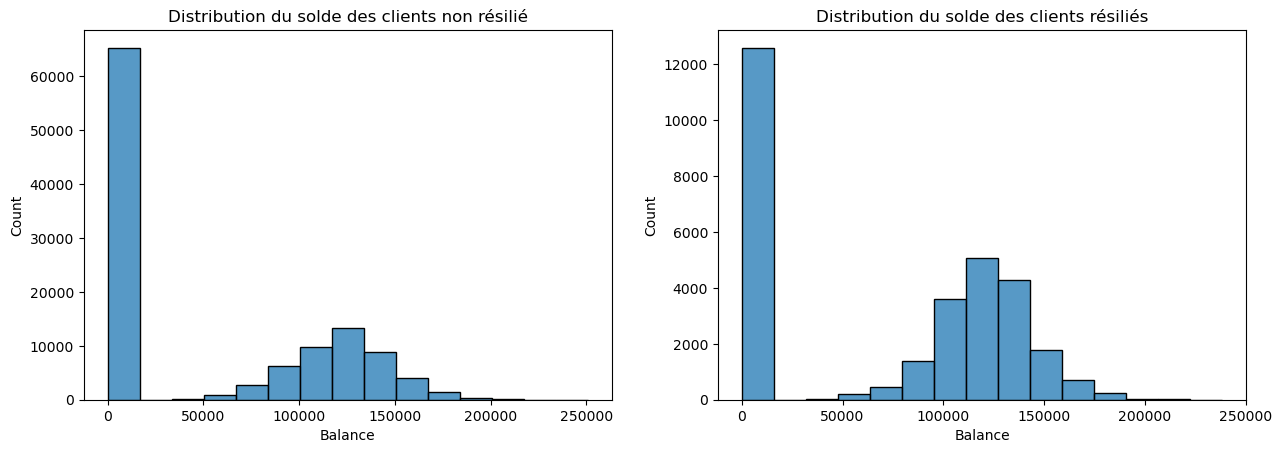

In [ ]:
df_balance = df["Balance"]
desc = df.groupby('Exited')["Balance"].describe()
print(desc)

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
axs[0].set_title('Distribution du solde des clients non résilié')
axs[1].set_title('Distribution du solde des clients résiliés')
sns.histplot( df.query("Exited == 0")["Balance"], bins=15, ax=axs[0])
sns.histplot( df.query("Exited == 1")["Balance"], bins=15, ax=axs[1])
plt.show()


In [ ]:
print("H0 : Il n'y a pas de différence de Balance entre les clients ayant résiliés et ceux n'ayant pas résilié.")
# Test de student 2 groupes indépendant

df_exited = df.query('Exited == 1')
df_not_exited = df.query('Exited == 0')

alpha = 0.02
results = ttest_ind(df_exited["Balance"], df_not_exited["Balance"])
print(results)
print(f"p_value = {results.pvalue}")
if(results.pvalue < alpha):
   print("Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de Balance  entre les clients ayant résiliés et ceux n'ayant pas résilié.")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")

H0 : Il n'y a pas de différence de Balance entre les clients ayant résiliés et ceux n'ayant pas résilié.
TtestResult(statistic=np.float64(49.94722364010174), pvalue=np.float64(0.0), df=np.float64(143577.0))
p_value = 0.0
Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de credit score  entre les clients ayant résiliés et ceux n'ayant pas résilié.


## NumOfProducts

NumOfProducts
2    73301
1    67364
3     2510
4      404
Name: count, dtype: int64
Le taux de churn semble être plus important chez les femmes que chez les hommes


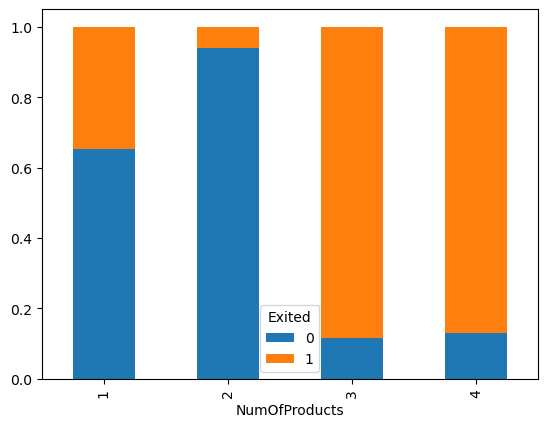

In [ ]:
df_numofproducts = df["NumOfProducts"]
value_counts = df_numofproducts.value_counts()
print(value_counts)
pd.crosstab(df_numofproducts, df["Exited"], normalize="index").plot(kind="bar", stacked=True)

In [91]:
print("H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables indépendantes l'une de l'autre")
contingency_table = pd.crosstab(df["NumOfProducts"], df["Exited"])
results = chi2_contingency(contingency_table)
print(results)
if(results.pvalue < 0.02):
   print("Nous pouvons rejeter H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables dépendantes l'une de l'autre")
else:
   print("Nous n'avons suffisamment d'évidences pour rejeter H0")

H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables indépendantes l'une de l'autre
Chi2ContingencyResult(statistic=np.float64(25393.715822144062), pvalue=np.float64(0.0), dof=3, expected_freq=array([[53077.55281761, 14286.44718239],
       [57755.44354676, 15545.55645324],
       [ 1977.6832963 ,   532.3167037 ],
       [  318.32033933,    85.67966067]]))
Nous pouvons rejeter H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables dépendantes l'une de l'autre


## EstimatedSalary

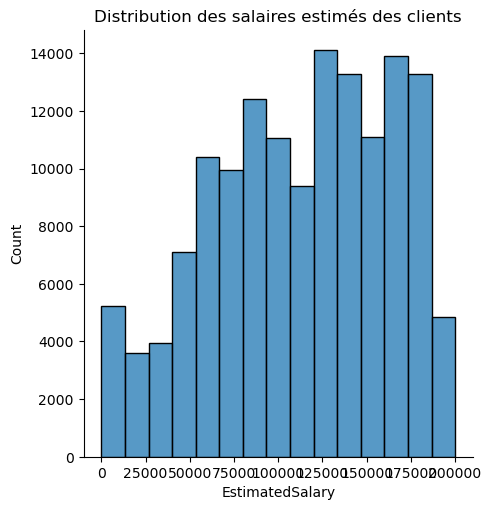

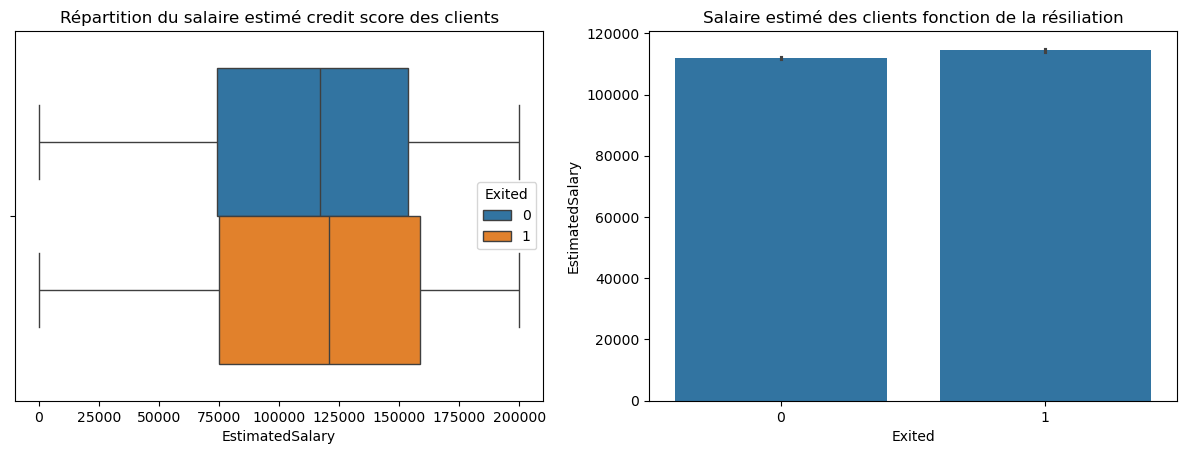

Il ne semble pas y avoir de différence en moyenne sur le salaire des clients ayant résiliés et les autres.


In [98]:
df_salary = df["EstimatedSalary"]

sns.displot(df_salary, bins=15)
plt.title("Distribution des salaires estimés des clients")
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
axs[0].set_title('Répartition du salaire estimé credit score des clients')
axs[1].set_title('Salaire estimé des clients fonction de la résiliation')
sns.boxplot(df, x="EstimatedSalary", hue="Exited", ax=axs[0])
sns.barplot(df, y="EstimatedSalary", x="Exited", ax=axs[1])
plt.show()

print("Il ne semble pas y avoir de différence en moyenne sur le salaire des clients ayant résiliés et les autres.")

In [93]:
print("H0 : Il n'y a pas de différence de salaire moyen entre les clients ayant résiliés et ceux n'ayant pas résilié.")
# Test de student 2 groupes indépendant

df_exited = df.query('Exited == 1')
df_not_exited = df.query('Exited == 0')

alpha = 0.02
results = ttest_ind(df_exited["EstimatedSalary"], df_not_exited["EstimatedSalary"])
print(results)
print(f"p_value = {results.pvalue}")
if(results.pvalue < alpha):
   print("Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de salaire  entre les clients ayant résiliés et ceux n'ayant pas résilié.")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0.")

H0 : Il n'y a pas de différence de salaire moyen entre les clients ayant résiliés et ceux n'ayant pas résilié.
TtestResult(statistic=np.float64(7.348146974032962), pvalue=np.float64(2.0203370473962822e-13), df=np.float64(143577.0))
p_value = 2.0203370473962822e-13
Nous pouvons donc rejeter H0 : Il y a bien en moyenne une différence de salaire  entre les clients ayant résiliés et ceux n'ayant pas résilié.


### Analyse corrélation entre le salaire estimé et le solde

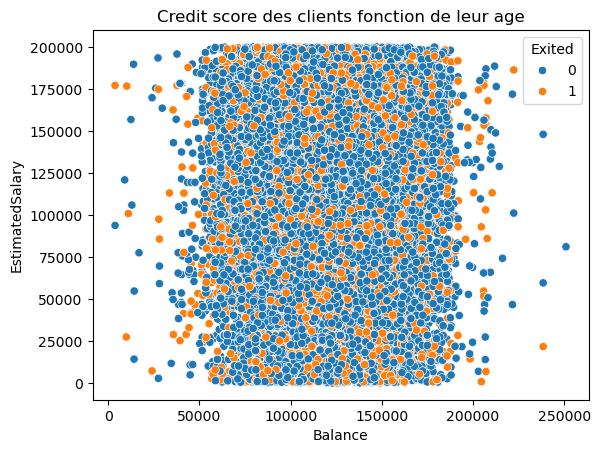

H0: Il n'y a pas de corrélation entre le solde et le salaire estimé des clients
p_value = 0.0013649728631739471
Il semble bien y avoir une corrélation entre le solde et le salaire estimé des clients


In [ ]:
# filter rows with balance 0
df = df.query("Balance > 0")
sns.scatterplot(df, y="EstimatedSalary", x="Balance", hue="Exited")
plt.title("Credit score des clients fonction de leur age")
plt.show()

print("H0: Il n'y a pas de corrélation entre le solde et le salaire estimé des clients")
results = pearsonr(df["Balance"], df["EstimatedSalary"])
print(f"p_value = {results.pvalue}")
if(results.pvalue < 0.02):
   print("Il semble bien y avoir une corrélation entre le solde et le salaire estimé des clients")
else:
   print("Nous n'avons pas suffisamment d'évidences pour rejeter H0")


## Has Credit Card

HasCrCard
1.0    108274
0.0     35305
Name: count, dtype: int64


Exited,0,1
HasCrCard,,
0.0,27246,8059
1.0,85883,22391


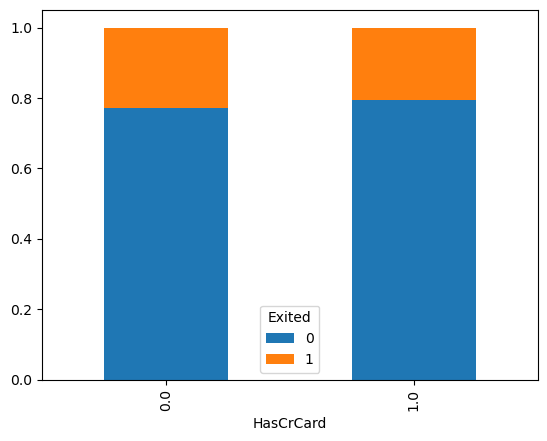

In [96]:
df_hasCrdCard = df["HasCrCard"]
value_counts = df_hasCrdCard.value_counts()
print(value_counts)
pd.crosstab(df_hasCrdCard, df["Exited"], normalize="index").plot(kind="bar", stacked=True)

pd.crosstab(df["HasCrCard"], df["Exited"])

In [95]:
print("H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables indépendantes l'une de l'autre")
contingency_table = pd.crosstab(df["HasCrCard"], df["Exited"])
results = chi2_contingency(contingency_table)
print(results)
if(results.pvalue < 0.02):
   print("Nous pouvons rejeter H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables dépendantes l'une de l'autre")
else:
   print("Nous n'avons suffisamment d'évidences pour rejeter H0")

H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables indépendantes l'une de l'autre
Chi2ContingencyResult(statistic=np.float64(73.3051887127428), pvalue=np.float64(1.1107552844464458e-17), dof=1, expected_freq=array([[27817.57321753,  7487.42678247],
       [85311.42678247, 22962.57321753]]))
Nous pouvons rejeter H0: La résilitation d'un client et le nbre de produits utilisés sont 2 variables dépendantes l'une de l'autre


## Conclusion

Liste des variables pertinentes : 
- Credit Score : Une valeur numérique représentant le score de crédit du client
- Geography : Le pays où réside le client (France, Spain ou Germany)
- Gender : Le genre du client (Male or Female)
- Age : L’âge du client
- Tenure : Le nombre d’années pendant lesquelles le client est avec la banque
- Balance : Le solde du compte du client
- NumOfProducts : Le nombre de produits bancaires utilisés par le client (par exemple, compte d’épargne, carte de crédit)
- IsActiveMember : Si le client est un membre actif (1 = oui, 0 = non)
- EstimatedSalary : Le salaire estimé du client

Le credit score et l'age étant lié, nous allons conserver uniquement le credit score.
Le solde et le salaire estimé étant lié, nous allons conserver uniquement le solde.

# Entrainement

In [149]:
training_df = df

### Traitement des NaNs

In [ ]:
df.isna().sum(axis = 0)
# Pas de NaN

ID                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Encoding

In [150]:
# Encoding de la variable Geography, Gender
from sklearn.preprocessing import OneHotEncoder
from sklearn import set_config

set_config(transform_output="pandas")

# df["Geography"].unique()
# df["Gender"].unique()
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_df = encoder.fit_transform(df[["Geography", "Gender"]])
encoded_df
training_df = pd.concat([training_df, encoded_df], axis=1)
training_df.head()

,ID,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,37765,15794860,Ch'eng,627,France,Male,28.0,7,131694.04,1,1.0,1.0,161205.61,0,0.0,0.0,1.0
1,130453,15728005,Hargreaves,597,France,Male,34.0,2,0.00,2,0.0,1.0,181419.29,0,0.0,0.0,1.0
2,77297,15686810,Ts'ui,724,France,Male,39.0,7,0.00,2,1.0,1.0,100862.54,0,0.0,0.0,1.0
3,40858,15760244,Trevisano,663,Germany,Female,56.0,5,118577.24,3,1.0,0.0,61164.45,1,1.0,0.0,0.0
4,19804,15810563,French,627,France,Female,33.0,5,0.00,2,1.0,1.0,103737.82,0,0.0,0.0,0.0


In [151]:
training_df.drop(columns=["Geography", "Gender"], inplace=True)
training_df.head()

,ID,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,37765,15794860,Ch'eng,627,28.0,7,131694.04,1,1.0,1.0,161205.61,0,0.0,0.0,1.0
1,130453,15728005,Hargreaves,597,34.0,2,0.00,2,0.0,1.0,181419.29,0,0.0,0.0,1.0
2,77297,15686810,Ts'ui,724,39.0,7,0.00,2,1.0,1.0,100862.54,0,0.0,0.0,1.0
3,40858,15760244,Trevisano,663,56.0,5,118577.24,3,1.0,0.0,61164.45,1,1.0,0.0,0.0
4,19804,15810563,French,627,33.0,5,0.00,2,1.0,1.0,103737.82,0,0.0,0.0,0.0


### Normalisation

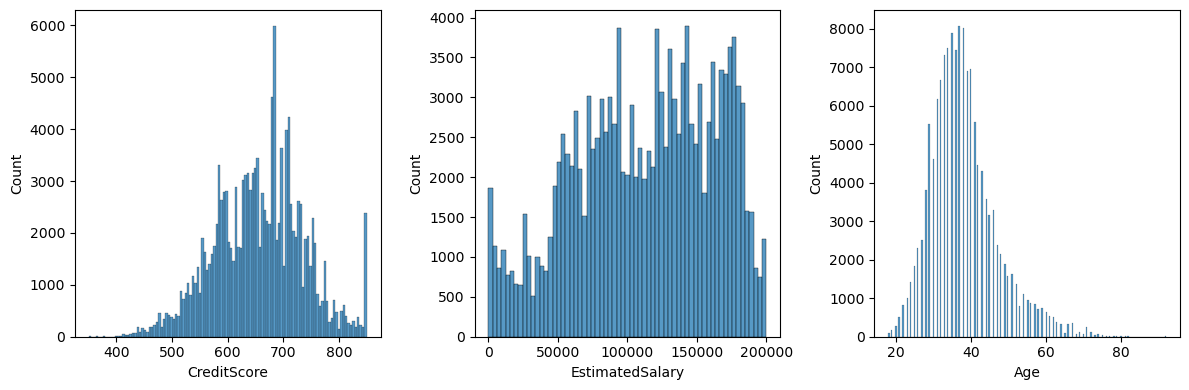

,ID,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,37765,15794860,Ch'eng,627,28.0,0.7,131694.04,0.000000,1.0,1.0,0.806047,0,0.0,0.0,1.0
1,130453,15728005,Hargreaves,597,34.0,0.2,0.00,0.333333,0.0,1.0,0.907125,0,0.0,0.0,1.0
2,77297,15686810,Ts'ui,724,39.0,0.7,0.00,0.333333,1.0,1.0,0.504303,0,0.0,0.0,1.0
3,40858,15760244,Trevisano,663,56.0,0.5,118577.24,0.666667,1.0,0.0,0.305794,1,1.0,0.0,0.0
4,19804,15810563,French,627,33.0,0.5,0.00,0.333333,1.0,1.0,0.518681,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,559,45.0,0.3,111634.29,0.000000,1.0,1.0,0.516740,0,1.0,0.0,1.0
143575,95939,15769974,Shih,597,41.0,1.0,119182.73,0.000000,0.0,0.0,0.606496,0,1.0,0.0,1.0
143576,152315,15592028,Hsiao,576,31.0,0.6,127299.56,0.000000,1.0,1.0,0.287819,0,0.0,1.0,1.0
143577,117952,15804009,Ch'ang,751,27.0,0.4,90721.11,0.000000,0.0,0.0,0.422466,0,0.0,0.0,0.0


In [ ]:
from pyparsing import C
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


fig, ax = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(df, x="CreditScore", ax = ax[0])
sns.histplot(df, x="EstimatedSalary", ax = ax[1])
sns.histplot(df, x="Age", ax = ax[2])
plt.tight_layout()
plt.show()

# Min-max
# Tenure, NumOfProducts, EstimatedSalary
minmaxScaler = MinMaxScaler()
subset_cols = df[['Tenure', 'NumOfProducts', 'EstimatedSalary']]
minmaxScaler.fit(subset_cols)
results = pd.DataFrame(minmaxScaler.transform(subset_cols), columns=subset_cols.columns)
training_df[['Tenure', 'NumOfProducts', 'EstimatedSalary']] = results
training_df

<Axes: xlabel='CreditScore', ylabel='Count'>

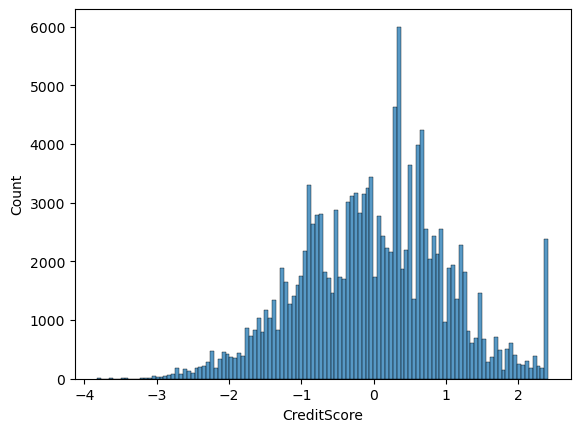

In [ ]:
# Standardisation
# CreditScore, Age

standardScaler = StandardScaler()
subset_cols = df[['CreditScore', 'Age']]
standardScaler.fit(subset_cols)
results = pd.DataFrame(standardScaler.transform(subset_cols), columns=subset_cols.columns)
training_df[['CreditScore', 'Age']] = results
training_df


In [167]:
training_df

,ID,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,37765,15794860,Ch'eng,-0.366683,-1.143467,0.7,131694.04,0.000000,1.0,1.0,0.806047,0,0.0,0.0,1.0
1,130453,15728005,Hargreaves,-0.740701,-0.467158,0.2,0.00,0.333333,0.0,1.0,0.907125,0,0.0,0.0,1.0
2,77297,15686810,Ts'ui,0.842641,0.096433,0.7,0.00,0.333333,1.0,1.0,0.504303,0,0.0,0.0,1.0
3,40858,15760244,Trevisano,0.082138,2.012643,0.5,118577.24,0.666667,1.0,0.0,0.305794,1,1.0,0.0,0.0
4,19804,15810563,French,-0.366683,-0.579876,0.5,0.00,0.333333,1.0,1.0,0.518681,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143574,97639,15759915,Onwumelu,-1.214457,0.772742,0.3,111634.29,0.000000,1.0,1.0,0.516740,0,1.0,0.0,1.0
143575,95939,15769974,Shih,-0.740701,0.321870,1.0,119182.73,0.000000,0.0,0.0,0.606496,0,1.0,0.0,1.0
143576,152315,15592028,Hsiao,-1.002514,-0.805313,0.6,127299.56,0.000000,1.0,1.0,0.287819,0,0.0,1.0,1.0
143577,117952,15804009,Ch'ang,1.179257,-1.256186,0.4,90721.11,0.000000,0.0,0.0,0.422466,0,0.0,0.0,0.0


## Preprocessing

In [ ]:

X = df[["CreditScore", "Geography_Germany", "Geography_Spain", "Gender_Male", "Tenure", "EstimatedSalary", "NumOfProducts", "IsActiveMember"]]
y = df["Exited"]

model = LogisticRegression()
model.fit(X, y)


ValueError: could not convert string to float: 'France'

# Make prediction

In [12]:
test_set = pd.read_csv('data/test_data.csv')

X_pred = test_set[["CreditScore", "Age"]]
predictions = model.predict(X_pred)
predictions

results = pd.DataFrame({
   "ID": test_set["ID"],
   "Exited": predictions
})
results = results.set_index("ID")
results.to_csv("submission.csv")